Table of Contents: 
1. Importing Libraries and Dataframes
2. Consider any security implications that might exist for this new data
3. Create a regional segmentation of the data
4. Create an exclusion flag for low-activity customers
5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents
6. Create an appropriate visualization to show the distribution of profiles
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
8. Identify links in customer profiles with regions and departments and visualizing them
9. Additional analysis for final report:

### 1. Importing Libararies and Dataframe

In [8]:
# Import Analysis Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
# Set path
path = r'C:\Users\franz\Documents\Exercise_4'

#### As I am always getting memory errors when trying to import the merged version of exercise 4.9 (even when using the relevant columns for part 1 only), I will import the data set with the relevant variables separately in each task. 

In [4]:
# Importing only the relevant columns due to memory issues
relevant_variables = 'order_number', 'age', 'prices', 'income', 'department_id', 'n_dependants', 'orders_day_of_week', 'order_hour_of_day', 'user_id', 'state', 'date_joined', 'marital_status', 'gender', 'spending_flag'
ords_prods_cust = pd.read_csv(os.path.join(path, '02_Data','prepared_data', 'ords_prods_cust_merge.csv'), usecols = relevant_variables)

### 2. Consider any security implications that might exist for this new data

I have to check if I have received personally identifiable information (PII). This type of data is covered extensively in the GDPR, a data privacy regulation in the European Union that governs the storage, usage, and sharing of data. If even a single column within your data set could potentially be traced back to a particular person, then you’re working with PII. Particularly sensitive are names, email addresses, physical addresses, and phone numbers.

The following columns are PII´s:
first_name
last_name

Therefore, I will not import these columns to Jupyter and will not perform any analysis with that data.

### 3. Create a regional segmentation of the data

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [3]:
# Importing only the relevant columns due to memory issues
relevant_variables = 'user_id', 'state', 'department_id', 'prices', 'user_id', 'order_number', 'age', 'n_dependants', 'income'
ords_prods_cust_task3 = pd.read_csv(os.path.join(path, '02_Data','prepared_data', 'ords_prods_cust_merge.csv'), usecols = relevant_variables)

In [5]:
# Data Export: 
ords_prods_cust_task3.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task3_pre_analysis.pkl'))

In [12]:
ords_prods_cust = ords_prods_cust_task3

In [13]:
ords_prods_cust.head()

,department_id,prices,user_id,order_number,state,age,n_dependants,income,region
0,19,5.8,138,28,Minnesota,81,1,49620,Region 2 (Midwest)
1,19,5.8,138,30,Minnesota,81,1,49620,Region 2 (Midwest)
2,12,20.0,138,1,Minnesota,81,1,49620,Region 2 (Midwest)
3,12,20.0,138,10,Minnesota,81,1,49620,Region 2 (Midwest)
4,10,12.9,138,9,Minnesota,81,1,49620,Region 2 (Midwest)


In [14]:
# creating a for-loop to assign the regions to the different states in a result_task3 list:

result_task3 = []

for value in ords_prods_cust["state"]:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey': 
        result_task3.append('Region 1 (Northeast)')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        result_task3.append('Region 2 (Midwest)')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Mississippi' or value == 'Alabama' or value == 'Tennessee' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana' or value == 'Oklahoma':
        result_task3.append('Region 3 (South)')
    elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah'or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        result_task3.append('Region 4 (West)')
    else: 
        result_task3.append('unknown state')

In [15]:
# create a new column and assign the result - list
ords_prods_cust['region'] = result_task3

In [17]:
ords_prods_cust.head()

,department_id,prices,user_id,order_number,state,age,n_dependants,income,region
0,19,5.8,138,28,Minnesota,81,1,49620,Region 2 (Midwest)
1,19,5.8,138,30,Minnesota,81,1,49620,Region 2 (Midwest)
2,12,20.0,138,1,Minnesota,81,1,49620,Region 2 (Midwest)
3,12,20.0,138,10,Minnesota,81,1,49620,Region 2 (Midwest)
4,10,12.9,138,9,Minnesota,81,1,49620,Region 2 (Midwest)


In [18]:
ords_prods_cust['region'].value_counts()

Region 3 (South)        10791885
Region 4 (West)          8292913
Region 2 (Midwest)       7597325
Region 1 (Northeast)     5722736
Name: region, dtype: int64

In [18]:
# performing crosstab for check of missspelled state names
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['state'], dropna = False)

In [19]:
# copy the table straight to your clipboard, allowing you to then paste it into Excel for easy viewing. 
crosstab.to_clipboard()

Based on crosstab, Indiana was missing in my for-loop. I have added it now. Therefore, no unknown states are assigned anymore.

In [10]:
# Data Export: 
ords_prods_cust.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task3.pkl'))

### 4. Create an exclusion flag for low-activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [9]:
# creating a for-loop to assign the low-activity flag in a result_task4 list:

result_task4 = []

for value in ords_prods_cust["order_number"]:
    if value <= 5:
        result_task4.append('low_activity_customer')
    else: 
        result_task4.append('high_activity_customer')

In [10]:
# create a new column and assign the result - list
ords_prods_cust['exclusion_flag'] = result_task4

In [21]:
ords_prods_cust.head()

,department_id,prices,user_id,order_number,state,age,n_dependants,income,region,exclusion_flag
0,19,5.8,138,28,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
1,19,5.8,138,30,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
2,12,20.0,138,1,Minnesota,81,1,49620,Region 2 (Midwest),low_activity_customer
3,12,20.0,138,10,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
4,10,12.9,138,9,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer


In [23]:
ords_prods_cust['exclusion_flag'].value_counts()

high_activity_customer    22787976
low_activity_customer      9616883
Name: exclusion_flag, dtype: int64

In [11]:
ords_prods_cust.shape

(22784558, 16)

In [34]:
# performing crosstab for check of assignment errors
crosstab_task4 = pd.crosstab(ords_prods_cust['order_number'], ords_prods_cust['exclusion_flag'], dropna = False)

In [32]:
# copy the table straight to your clipboard, allowing you to then paste it into Excel for easy viewing. 
crosstab_task4.to_clipboard()

In [12]:
# Crosstab checks were fine, version low performing customers will now be removed.
ords_prods_cust = ords_prods_cust[ords_prods_cust.exclusion_flag != 'low_activity_customer']

In [32]:
# Check if deletion was successful
ords_prods_cust['exclusion_flag'].value_counts()

high_activity_customer    22787976
Name: exclusion_flag, dtype: int64

In [30]:
# Data Export: 
ords_prods_cust.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task4.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [5]:
# importing the departments df to revise its content
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', '4.10_task4.pkl'))

In [83]:
# importing the departments df to revise its content
df_departments = pd.read_csv(os.path.join(path, '02_Data', 'prepared_data', 'departments_wrangled.csv'), usecols = all)

In [35]:
df_departments.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
ords_prods_cust.head()

,department_id,prices,user_id,order_number,state,age,n_dependants,income,region,exclusion_flag
0,19,5.8,138,28,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
1,19,5.8,138,30,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
3,12,20.0,138,10,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
4,10,12.9,138,9,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer
5,4,1.7,138,17,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer


### Age Profiles:

In [7]:
ords_prods_cust['age'].describe()

count    2.278798e+07
mean     4.945714e+01
std      1.848502e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Based on descriptive analysis, the following age profiles will be defined
Young: 18 - 33 years

Mid-age: 34 - 49 years

Seniors: 50 - 81 years

In [13]:
# creating the age profiles:
# old: older than 40 years
# young: 40 years or younger

result_task5_age = []

for value in ords_prods_cust["age"]:
    if value <= 33:
        result_task5_age.append('young')
    elif value <= 49 and value > 33:
        result_task5_age.append('mid-age')
    else: 
        result_task5_age.append('senior')

### Wealth Profiles

In [11]:
ords_prods_cust['income'].describe()

count    2.278798e+07
mean     9.997077e+04
std      4.339599e+04
min      2.590300e+04
25%      6.763100e+04
50%      9.686300e+04
75%      1.281820e+05
max      5.939010e+05
Name: income, dtype: float64

In [16]:
# creating the income profiles:

result_task5_wealth = []

for value in ords_prods_cust["income"]:
    if value <= 50000:
        result_task5_wealth.append('low')
    elif value > 50000 and value <= 100000:
        result_task5_wealth.append('middle')
    else: 
        result_task5_wealth.append('high')

### Family status profiles

In [20]:
# creating the family_status profiles:

result_task5_family_status = []

for value in ords_prods_cust["n_dependants"]:
    if value<= 0:
        result_task5_family_status.append('single_adult')
    else: 
        result_task5_family_status.append('parent')

### Pet owner profiles:

In [24]:
# creating the pet owner profiles:

result_task5_pet_owner_status = []

for value in ords_prods_cust["department_id"]:
    if value == 8:
        result_task5_pet_owner_status.append('pet_owner')
    else: 
        result_task5_pet_owner_status.append('no_pet_owner')

### Vegetarian profiles:

In [26]:
# creating the pet owner profiles:

result_task5_veggy_status = []

for value in ords_prods_cust["department_id"]:
    if value == 12:
        result_task5_veggy_status.append('no vegetarian')
    else: 
        result_task5_veggy_status.append('vegetarian')

### Alcohol drinker profiles

In [27]:
# creating the pet owner profiles:

result_task5_alc_status = []

for value in ords_prods_cust["department_id"]:
    if value == 5:
        result_task5_alc_status.append('alcohol drinker')
    else: 
        result_task5_alc_status.append('no alcohol drinker')

In [28]:
# create new columns and assign the result - list
ords_prods_cust['age_profile'] = result_task5_age
ords_prods_cust['wealth_profile'] = result_task5_wealth
ords_prods_cust['family_status_profile'] = result_task5_family_status
ords_prods_cust['pet_owner_profile'] = result_task5_pet_owner_status
ords_prods_cust['veggy_profile'] = result_task5_veggy_status
ords_prods_cust['alcohol_profile'] = result_task5_alc_status

In [29]:
ords_prods_cust.head()

,department_id,prices,user_id,order_number,state,age,n_dependants,income,region,exclusion_flag,age_profile,wealth_profile,family_status_profile,pet_owner_profile,veggy_profile,alcohol_profile
0,19,5.8,138,28,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer,senior,low,parent,no_pet_owner,vegetarian,no alcohol drinker
1,19,5.8,138,30,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer,senior,low,parent,no_pet_owner,vegetarian,no alcohol drinker
3,12,20.0,138,10,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer,senior,low,parent,no_pet_owner,no vegetarian,no alcohol drinker
4,10,12.9,138,9,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer,senior,low,parent,no_pet_owner,vegetarian,no alcohol drinker
5,4,1.7,138,17,Minnesota,81,1,49620,Region 2 (Midwest),high_activity_customer,senior,low,parent,no_pet_owner,vegetarian,no alcohol drinker


In [30]:
# Data Export: 
ords_prods_cust.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task5.pkl'))

### 6. Create an appropriate visualization to show the distribution of profiles.

In [41]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', '4.10_task5.pkl'))

Age Group Distribution

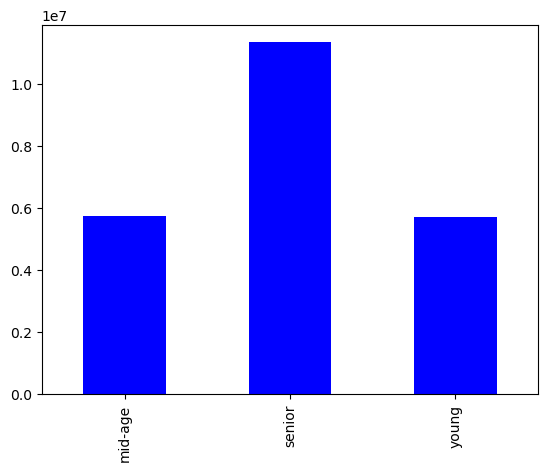

In [31]:
age_bar = ords_prods_cust['age_profile'].value_counts().sort_index().plot.bar(color=['blue'])

Alcohol Drinkers Distribution

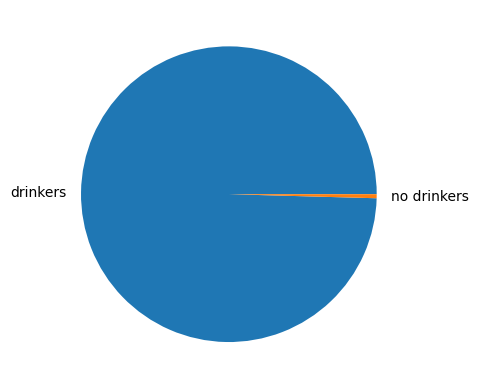

In [52]:
alcohol_profile = ords_prods_cust['alcohol_profile'].value_counts().plot.pie(labels = ['drinkers','no drinkers'], label = '')

Pet Owners Distribution

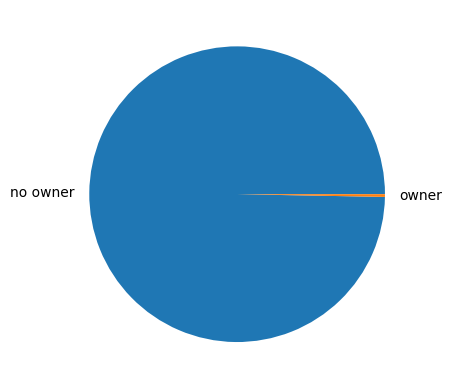

In [74]:
pet_owner_profile = ords_prods_cust['pet_owner_profile'].value_counts().plot.pie(labels = ['no owner','owner'], label = '')

Customers Wealth Status

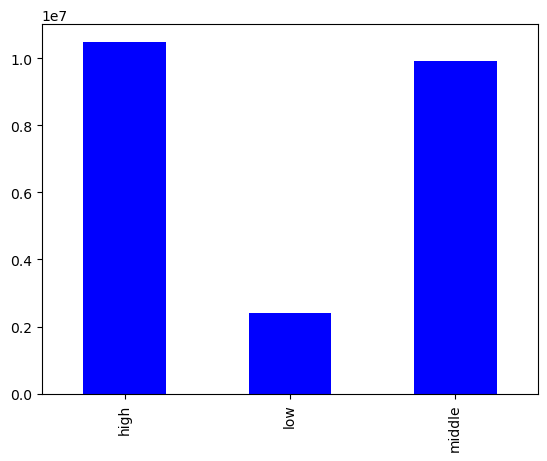

In [53]:
wealth_profile_bar = ords_prods_cust['wealth_profile'].value_counts().sort_index().plot.bar(color=['blue'])

Customers Marital Status

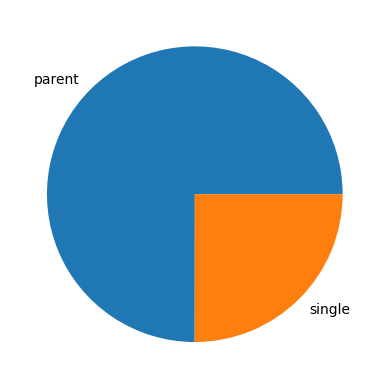

In [54]:
family_status_pie = ords_prods_cust['family_status_profile'].value_counts().plot.pie(labels = ['parent','single'], label = '')

Customers Nutrition Status

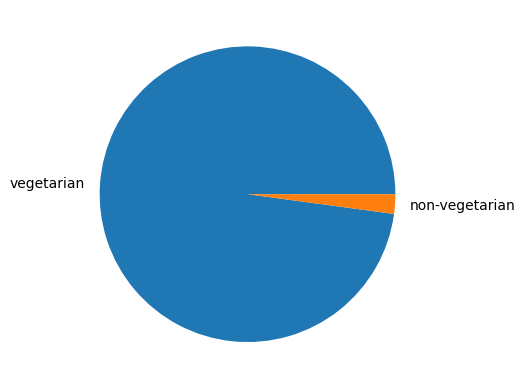

In [111]:
veggie_profile_pie = ords_prods_cust['veggy_profile'].value_counts().plot.pie(labels = ['vegetarian','non-vegetarian'], label = '')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [57]:
# Overview of expenditure leads to fishy max and mean values

ords_prods_cust.groupby('age_profile').agg({'prices': ['min', 'max', 'mean']})

prices          
               min  max mean
age_profile                 
mid-age        1.0  inf  NaN
senior         1.0  inf  NaN
young          1.0  inf  NaN

The prices column includes some unclean data that needs to be addressed. 

In [22]:
# checking the values inside the prices column via crosstab
crosstab = pd.crosstab(ords_prods_cust['prices'], ords_prods_cust['combined_profile'], dropna = False)

In [23]:
# copy the table straight to your clipboard, allowing you to then paste it into Excel for easy viewing. 
crosstab.to_clipboard()

via crosstab, the following prices could be found:
14900
inf
both are assumed to be dirty data and will thus be deleted

In [58]:
# dropping rows with price value > 25
ords_prods_cust.drop(ords_prods_cust.loc[ords_prods_cust['prices']>25].index, inplace=True)

In [6]:
crosstab_1 = pd.crosstab(ords_prods_cust['prices'], ords_prods_cust['combined_profile'], dropna = False)

In [7]:
# copy the table straight to your clipboard, allowing you to then paste it into Excel for easy viewing. 
crosstab_1.to_clipboard()

### 7.1 Aggregating the max, mean, and min variables on a customer-profile level for expenditure:

In [59]:
# Overview of expenditure leads to correct max and mean values

ords_prods_cust.groupby('age_profile').agg({'prices': ['min', 'max', 'mean']})

prices                
               min   max      mean
age_profile                       
mid-age        1.0  25.0  7.793769
senior         1.0  25.0  7.790755
young          1.0  25.0  7.785153

In [60]:
ords_prods_cust.groupby('wealth_profile').agg({'prices': ['min', 'max', 'mean']})

prices                
                  min   max      mean
wealth_profile                       
high              1.0  25.0  7.946404
low               1.0  25.0  6.717017
middle            1.0  25.0  7.884986

In [61]:
ords_prods_cust.groupby('family_status_profile').agg({'prices': ['min', 'max', 'mean']})

prices                
                         min   max      mean
family_status_profile                       
parent                   1.0  25.0  7.789961
single_adult             1.0  25.0  7.790567

In [62]:
ords_prods_cust.groupby('pet_owner_profile').agg({'prices': ['min', 'max', 'mean']})

prices                
                     min   max      mean
pet_owner_profile                       
no_pet_owner         1.0  25.0  7.789841
pet_owner            1.0  15.0  7.882705

In [63]:
ords_prods_cust.groupby('veggy_profile').agg({'prices': ['min', 'max', 'mean']})

prices                 
                 min   max       mean
veggy_profile                        
no vegetarian    8.0  25.0  16.299301
vegetarian       1.0  20.0   7.604611

In [64]:
ords_prods_cust.groupby('alcohol_profile').agg({'prices': ['min', 'max', 'mean']})

prices                
                      min   max      mean
alcohol_profile                          
alcohol drinker       1.0  15.0  8.156588
no alcohol drinker    1.0  25.0  7.788504

### 7.2 Aggregating the max, mean, and min variables on a customer-profile level for usage frequency:

In [66]:
ords_prods_cust.groupby('age_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                     min max       mean
age_profile                            
mid-age                6  99  23.283027
senior                 6  99  23.149996
young                  6  99  23.056902

In [67]:
ords_prods_cust.groupby('wealth_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                        min max       mean
wealth_profile                            
high                      6  99  23.217555
low                       6  99  22.370956
middle                    6  99  23.291071

In [68]:
ords_prods_cust.groupby('family_status_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                               min max       mean
family_status_profile                            
parent                           6  99  23.108280
single_adult                     6  99  23.316065

In [69]:
ords_prods_cust.groupby('pet_owner_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                           min max       mean
pet_owner_profile                            
no_pet_owner                 6  99  23.166282
pet_owner                    6  99  21.107683

In [70]:
ords_prods_cust.groupby('veggy_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                       min max       mean
veggy_profile                            
no vegetarian            6  99  21.844850
vegetarian               6  99  23.188925

In [71]:
ords_prods_cust.groupby('alcohol_profile').agg({'order_number': ['min', 'max', 'mean']})

order_number               
                            min max       mean
alcohol_profile                               
alcohol drinker               6  99  21.961801
no alcohol drinker            6  99  23.165510

In [72]:
# Data Export: 
ords_prods_cust.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task7.pkl'))

### 8. Identify links in customer profiles with regions and departments and visualizing them

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Produce suitable charts to illustrate your results and export them in your project folder.

In [88]:
# checking the meaning of the department_id´s
df_departments.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### 8.1 Observations on age groups

In [81]:
crosstab_age_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['age_profile'], dropna = False)
crosstab_age_region

age_profile,mid-age,senior,young
region,,,
Region 1 (Northeast),1000372,2015610,1011499
Region 2 (Midwest),1368896,2635410,1320998
Region 3 (South),1914367,3747183,1925528
Region 4 (West),1464856,2932690,1447149


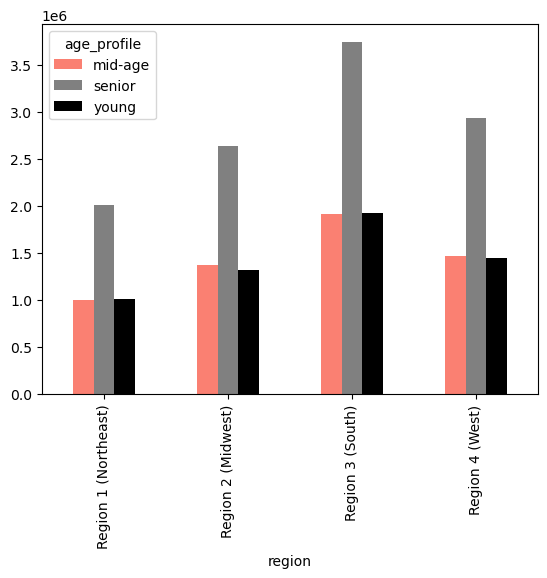

In [92]:
bar_age_regions = crosstab_age_region.plot(kind = 'bar', stacked = False, color = ['salmon', 'grey','black'])

In all age groups, most customers live in the southern part of US, while southeast has the least.

In [133]:
# exporting the chart
bar_age_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_age_regions.png'))

In [82]:
crosstab_age_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['age_profile'], dropna = False)
crosstab_age_departments

age_profile,mid-age,senior,young
department_id,,,
1,378080,754514,373434
2,6199,12522,6609
3,207608,410306,206744
4,1712418,3364351,1689319
5,24989,48007,26589
6,46783,90383,46692
7,475381,954623,471308
8,16076,33510,17184
9,146479,292717,148360


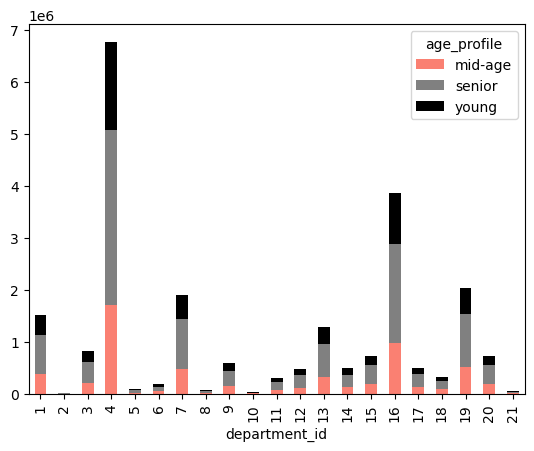

In [90]:
bar_age_departments = crosstab_age_departments.plot(kind = 'bar', stacked = True, color = ['salmon', 'grey','black'])

In all age groups, the most favourite articles are alcohol products, followed by household and deli products.

Personal care and bakery articles sell least well among all age groups.

In [134]:
# exporting the chart
bar_age_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_age_departments.png'))

### 8.2 Observations on different wealth groups

In [93]:
crosstab_wealth_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['wealth_profile'], dropna = False)
crosstab_wealth_region

wealth_profile,high,low,middle
region,,,
Region 1 (Northeast),1858133,418008,1751340
Region 2 (Midwest),2506666,559590,2259048
Region 3 (South),3434943,821222,3330913
Region 4 (West),2682528,603172,2558995


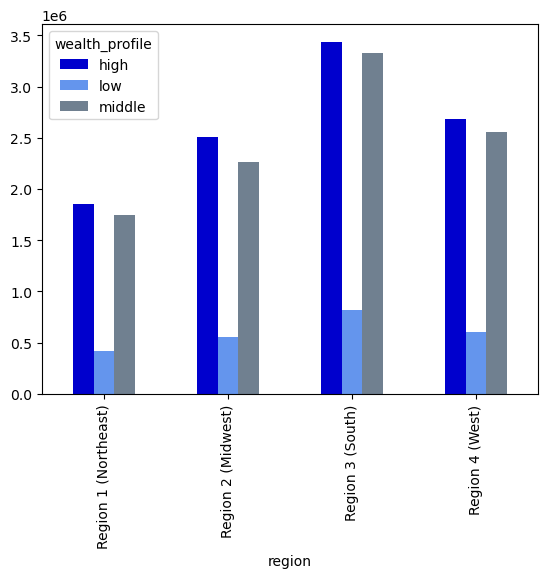

In [99]:
bar_wealth_regions = crosstab_wealth_region.plot(kind = 'bar', stacked = False, color = ['mediumblue', 'cornflowerblue','slategrey'])

In the south, all three wealth profiles are most common. 

Overall, there are relatively few people with low incomes.

In [135]:
# exporting the chart
bar_wealth_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_wealth_regions.png'))

In [97]:
crosstab_wealth_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['wealth_profile'], dropna = False)
crosstab_wealth_departments

wealth_profile,high,low,middle
department_id,,,
1,707054,145742,653232
2,11691,2692,10947
3,389801,75369,359488
4,3163749,595637,3006702
5,48728,11468,39389
6,86247,14889,82722
7,836302,278429,786581
8,32714,6067,27989
9,282124,42960,262472


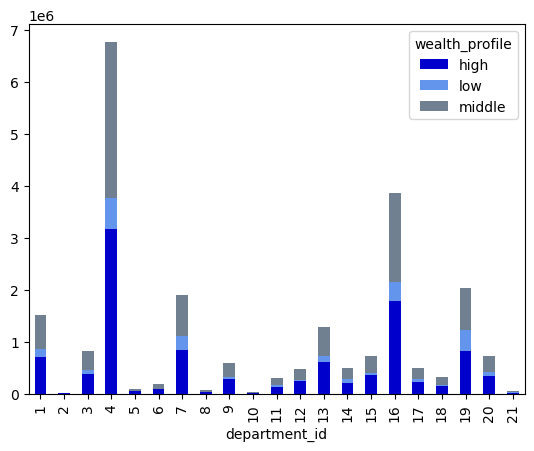

In [142]:
bar_wealth_departments = crosstab_wealth_departments.plot(kind = 'bar', stacked = True, color = ['mediumblue', 'cornflowerblue','slategrey'])

In all wealth groups, the most favourite articles are alcohol products, followed by household and deli products.

Personal care and bakery articles sell least well among all age groups.

In [143]:
# exporting the chart
bar_wealth_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_wealth_departments.png'))

### 8.3 Observations on different nutrition groups

In [100]:
crosstab_veggy_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['veggy_profile'], dropna = False)
crosstab_veggy_region

veggy_profile,no vegetarian,vegetarian
region,,
Region 1 (Northeast),85730,3941751
Region 2 (Midwest),113210,5212094
Region 3 (South),161280,7425798
Region 4 (West),125889,5718806


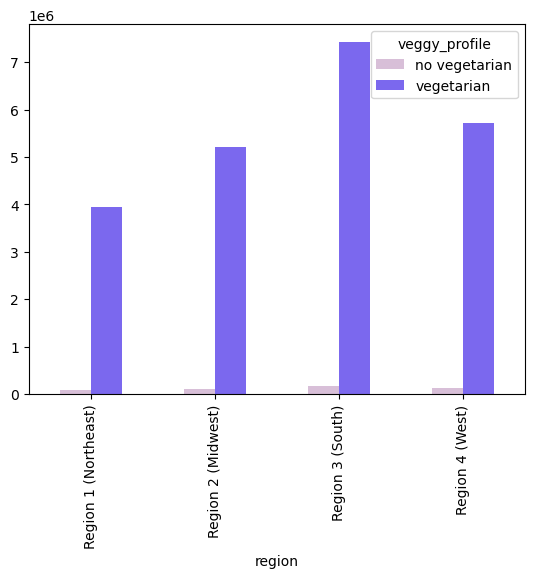

In [116]:
bar_veggy_regions = crosstab_veggy_region.plot(kind = 'bar', stacked = False, color = ['thistle', 'mediumslateblue'])

Overall, there are are more vegetarians than non-vegetarians in all regions. This data might however be biased as probably all the meat-eaters buy their meat at instacart. 

In [137]:
# exporting the chart
bar_veggy_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_veggy_regions.png'))

In [113]:
crosstab_veggy_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['veggy_profile'], dropna = False)
crosstab_veggy_departments

veggy_profile,no vegetarian,vegetarian
department_id,,
1,0,1506028
2,0,25330
3,0,824658
4,0,6766088
5,0,99585
6,0,183858
7,0,1901312
8,0,66770
9,0,587556


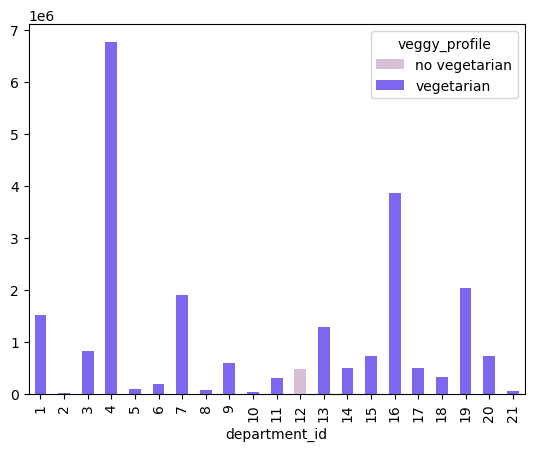

In [115]:
bar_veggy_departments = crosstab_veggy_departments.plot(kind = 'bar', stacked = True, color = ['thistle', 'mediumslateblue'])

As expected, only the meat-eaters buy articles from department with id 12 (meat and seafood). For vegetarians, alcoholic products and household products are the bestsellers.

In [138]:
# exporting the chart
bar_veggy_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_veggy_departments.png'))

### 8.4 Observations based on marital status

In [117]:
crosstab_marital_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['family_status_profile'], dropna = False)
crosstab_marital_region

family_status_profile,parent,single_adult
region,,
Region 1 (Northeast),3034962,992519
Region 2 (Midwest),3984405,1340899
Region 3 (South),5684024,1903054
Region 4 (West),4382495,1462200


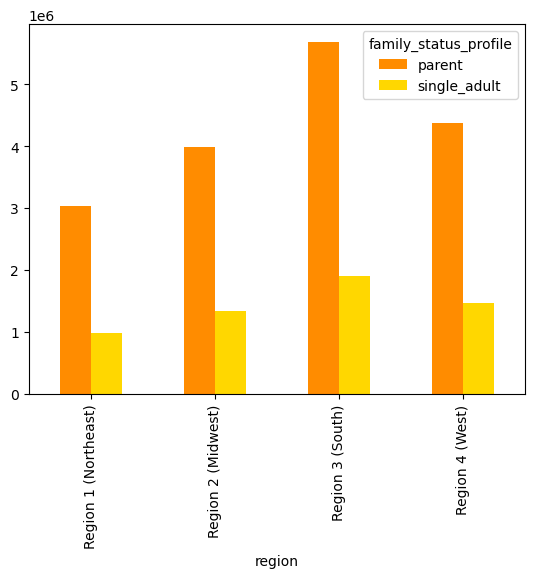

In [119]:
bar_marital_regions = crosstab_marital_region.plot(kind = 'bar', stacked = False, color = ['darkorange', 'gold'])

Most parents and singles live in the South of US. 

In [140]:
# exporting the chart
bar_marital_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_marital_regions.png'))

In [139]:
crosstab_marital_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['family_status_profile'], dropna = False)
crosstab_marital_departments

family_status_profile,parent,single_adult
department_id,,
1,1130751,375277
2,18851,6479
3,617813,206845
4,5067957,1698131
5,73743,25842
6,137250,46608
7,1422962,478350
8,49915,16855
9,441543,146013


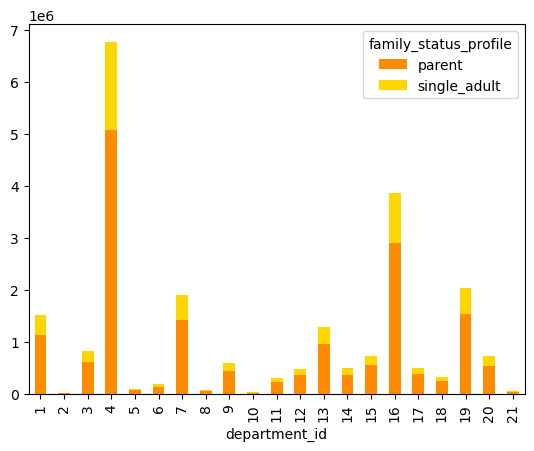

In [121]:
bar_marital_departments = crosstab_marital_departments.plot(kind = 'bar', stacked = True, color = ['darkorange', 'gold'])

Independent of the family status, the most favourite articles are alcohol products, followed by household and deli products.

Personal care and bakery articles sell least well among all age groups.

In [141]:
# exporting the chart
bar_marital_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_marital_departments.png'))

### 8.5 Observations based on alcohol drinking status

In [123]:
crosstab_alcohol_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['alcohol_profile'], dropna = False)
crosstab_alcohol_region

alcohol_profile,alcohol drinker,no alcohol drinker
region,,
Region 1 (Northeast),17074,4010407
Region 2 (Midwest),23648,5301656
Region 3 (South),33396,7553682
Region 4 (West),25467,5819228


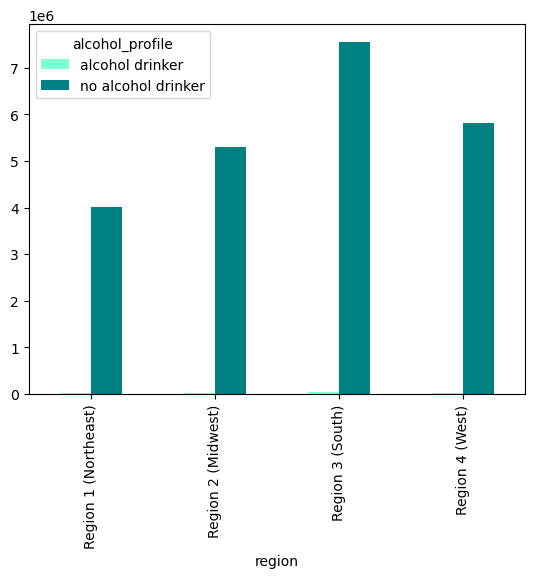

In [124]:
bar_alcohol_regions = crosstab_alcohol_region.plot(kind = 'bar', stacked = False, color = ['aquamarine', 'teal'])

Most alcohol and non-alcohol drinkers live in the south of US.

In [144]:
# exporting the chart
bar_alcohol_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_alcohol_regions.png'))

In [125]:
crosstab_alcohol_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['alcohol_profile'], dropna = False)
crosstab_alcohol_departments

alcohol_profile,alcohol drinker,no alcohol drinker
department_id,,
1,0,1506028
2,0,25330
3,0,824658
4,0,6766088
5,99585,0
6,0,183858
7,0,1901312
8,0,66770
9,0,587556


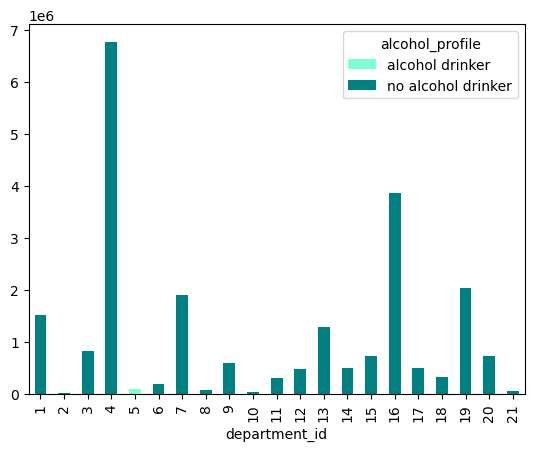

In [126]:
bar_alcohol_departments = crosstab_alcohol_departments.plot(kind = 'bar', stacked = True, color = ['aquamarine', 'teal'])

Independent of the alcohol-drinker status, the most favourite articles are alcohol products, followed by household and deli products.

Personal care and bakery articles sell least well among all age groups.

In [145]:
# exporting the chart
bar_alcohol_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_alcohol_departments.png'))

### 8.6 Observations based on pet owner status

In [128]:
crosstab_petowner_region = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['pet_owner_profile'], dropna = False)
crosstab_petowner_region

pet_owner_profile,no_pet_owner,pet_owner
region,,
Region 1 (Northeast),4014399,13082
Region 2 (Midwest),5310013,15291
Region 3 (South),7565741,21337
Region 4 (West),5827635,17060


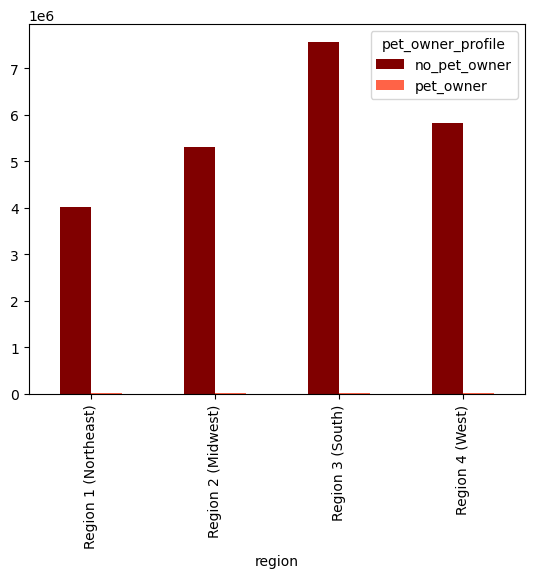

In [129]:
bar_petowner_regions = crosstab_petowner_region.plot(kind = 'bar', stacked = False, color = ['maroon', 'tomato'])

Most pet owners and no pet owners live in the south of US.

In [147]:
# exporting the chart
bar_petowner_regions.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_petowner_regions.png'))

In [146]:
crosstab_petowner_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['pet_owner_profile'], dropna = False)
crosstab_petowner_departments

pet_owner_profile,no_pet_owner,pet_owner
department_id,,
1,1506028,0
2,25330,0
3,824658,0
4,6766088,0
5,99585,0
6,183858,0
7,1901312,0
8,0,66770
9,587556,0


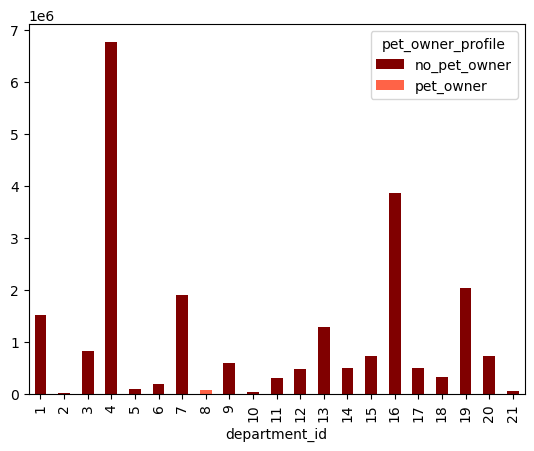

In [131]:
bar_petowner_departments = crosstab_petowner_departments.plot(kind = 'bar', stacked = True, color = ['maroon', 'tomato'])

Independent of the pet-owner status, the most favourite articles are alcohol products, followed by household and deli products.

Personal care and bakery articles sell least well among all age groups.

In [148]:
# exporting the chart
bar_petowner_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_petowner_departments.png'))

In [149]:
# Data Export: 
ords_prods_cust.to_pickle(os.path.join(path, '02_data','prepared_data', '4.10_task9.pkl'))

### 9. Additional analysis for final report:

For keyquestion 4: 

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'prepared_data', '4.10_task9.pkl'))

In [6]:
# creating a new column for active users:

result = []

for value in ords_prods_cust["user_id"]:
    if value >= 1:
        result.append('active_user')
    else: 
        result.append('invalid')

In [7]:
# create new columns and assign the result - list
ords_prods_cust['active_customer'] = result

In [8]:
ords_prods_cust['active_customer'].value_counts()

active_user    22784558
Name: active_customer, dtype: int64

In [10]:
crosstab_all_users_departments = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['active_customer'], dropna = False)
crosstab_all_users_departments

active_customer,active_user
department_id,
1,1506028
2,25330
3,824658
4,6766088
5,99585
6,183858
7,1901312
8,66770
9,587556


In [12]:
crosstab_all_users_departments.to_clipboard()

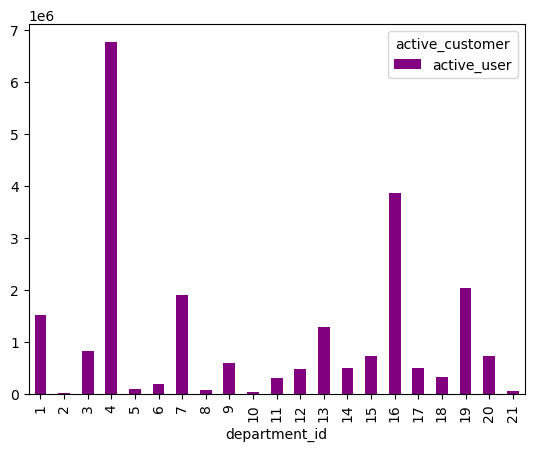

In [15]:
bar_all_users_departments = crosstab_all_users_departments.plot(kind = 'bar', stacked = False, color = ['purple'])

In [ ]:
# exporting the chart
bar_all_users_departments.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_bar_allusers_departments.png'))

For keyquestion 5.6:

In [19]:
crosstab_age_prices = pd.crosstab(ords_prods_cust['prices'], ords_prods_cust['age_profile'], dropna = False)

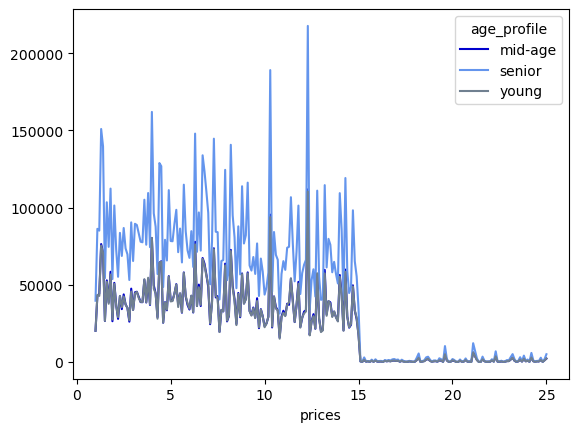

In [20]:
bar_crosstab_age_prices = crosstab_age_prices.plot(kind = 'line', stacked = False, color = ['mediumblue', 'cornflowerblue','slategrey'])

In [16]:
# exporting the chart
bar_crosstab_age_prices.figure.savefig(os.path.join(path, '04_Analysis','Vizualizations', '4.10_line_prices_ageprofile.png'))

In [21]:
ords_prods_cust.columns

Index(['department_id', 'prices', 'user_id', 'order_number', 'state', 'age',
       'n_dependants', 'income', 'region', 'exclusion_flag', 'age_profile',
       'wealth_profile', 'family_status_profile', 'pet_owner_profile',
       'veggy_profile', 'alcohol_profile'],
      dtype='object')